In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There are 7043 rows and 21 columns in the data.

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Apart from "SeniorCitizen" and "Tenure" which are numeric, Rest of the data is Object type.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Mean or average for 'SeniorCetizen' is 0.162 for 'Tenure' is 32.37 and 'Monyhly charges' is 64.76.
Minimum value in 'SeniorCetizen' and 'Tenure' is 0 and for 'MonthlyCharges' it's 18.25 and so on.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

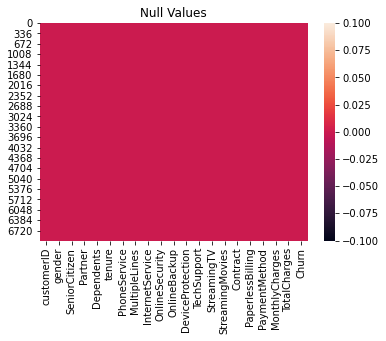

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no Null values in the data. 

# Data Visulisation

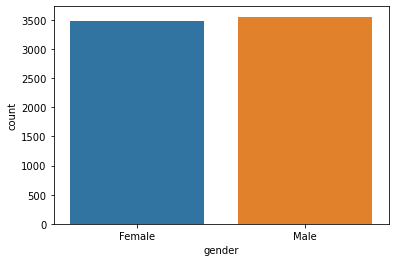

In [16]:
ax=sns.countplot(x='gender',data=df)


Male are 3600 and 3400 Female Customers.

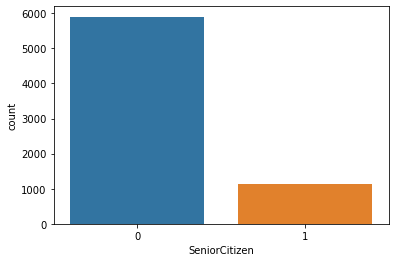

In [17]:
ax=sns.countplot(x='SeniorCitizen',data=df)


There are around 5900 non-Senior Citizen and around 1000 Senior Ciizens.

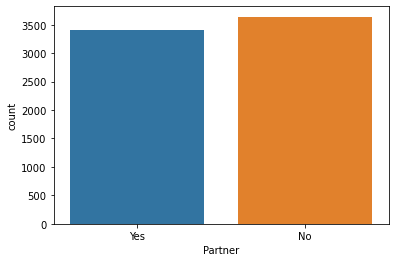

In [18]:
ax=sns.countplot(x='Partner',data=df)


Around 3400 customers have partners and 3600 do not have partners.

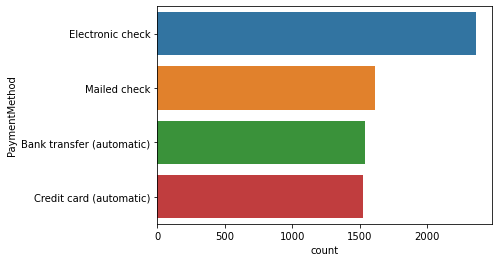

In [23]:
ax=sns.countplot(y='PaymentMethod',data=df)


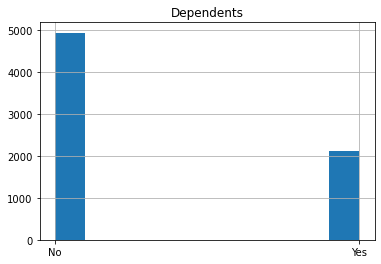

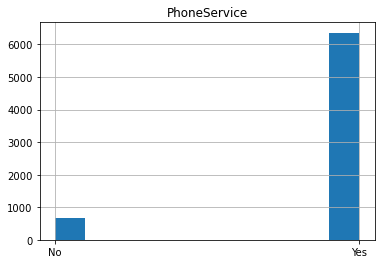

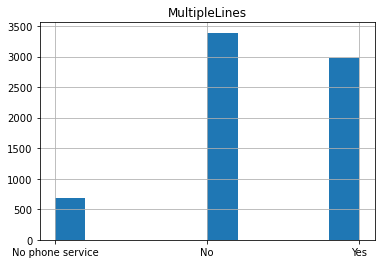

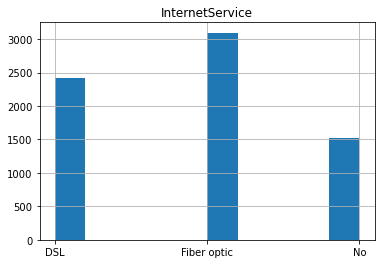

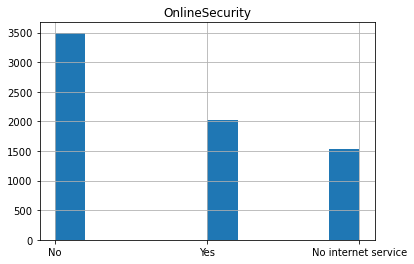

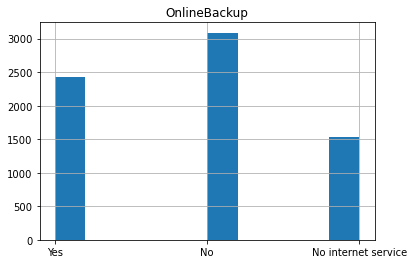

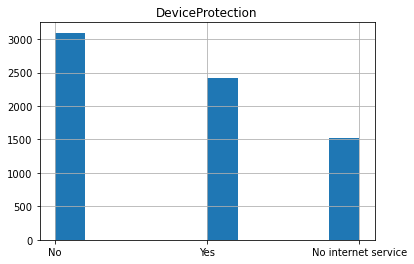

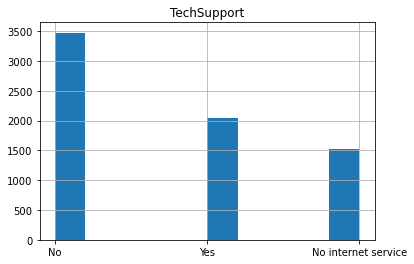

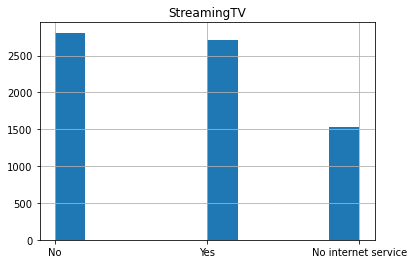

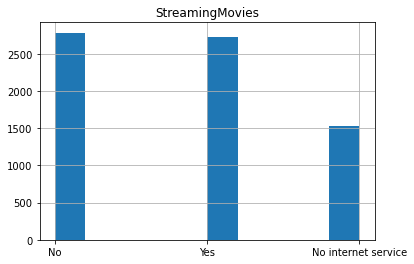

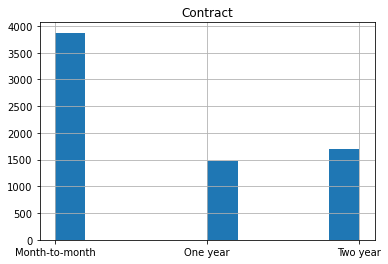

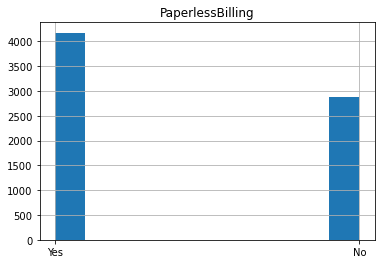

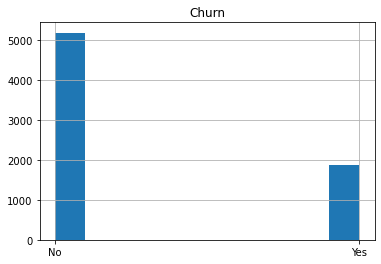

In [24]:
Index=[ 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']



for i in Index:
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()


Observations:
    1. 4900 Customers are independent and 2100 customers are dependent.
    2. 6500 Customers use Phone Service and 700 Customers don't use it.
    3. 3400 Customers don't have multiple lines and 3000 Customers have Multiple lines.
    4. 3100 Customers have Fiber optic internet service, 2400 have DSL and 1550 Dosen't have Internet Service.
    5. 3500 Customers don't have internet Security but, 2000 Customers do have online security.
    6. 2400 Customers have online backup but, 3100 don't have online backup.
    7. 2400 Customers have device protection but, 3100 don't have device protection.
    8. 3400 Customers don't have tech support but, 2100 Customers do have it.
    9. 4200 Customers have Paperless billing, but 2800 don't have it.
    10.5100 Customers don't Churn only 1900 do.

# Encoding the data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

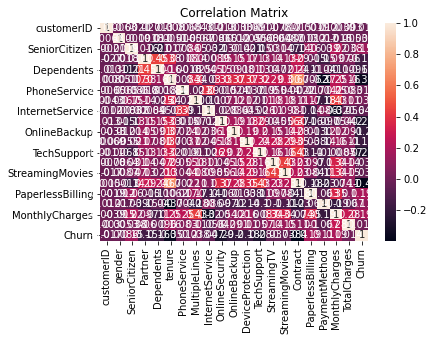

In [28]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

"MonthlyCharges" is highly Correlated with the Target variable, whereas "Contract" is least Correlated with the target Variable.

# Checking for outliers

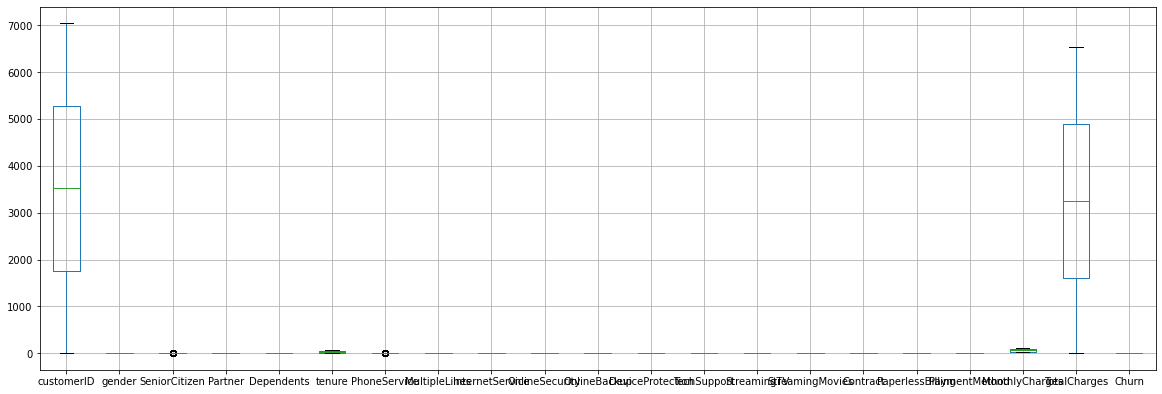

In [31]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are very few outliers present in the data.

In [32]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Keeping +/-(0.5) as the range of skewness.
There are some columns which are not following the range but bieng catagorical data it would not be treated. 

In [33]:
x=df.drop('Churn', axis =1)
y=df['Churn']

# Finding best random_state

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    predlr=rf.predict(x_test) 
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

Best accuracy is  0.9498343587316611  on Random_state  21


# Creating train test split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=98)

In [110]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8050165641268339
[[1411  184]
 [ 228  290]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1595
         1.0       0.61      0.56      0.58       518

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [111]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7567439659252247
[[1318  277]
 [ 237  281]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1595
         1.0       0.50      0.54      0.52       518

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



In [112]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.820160908660672
[[1467  128]
 [ 252  266]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      1595
         1.0       0.68      0.51      0.58       518

    accuracy                           0.82      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.81      0.82      0.81      2113



In [113]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.754850922858495
[[1595    0]
 [ 518    0]]
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1595
         1.0       0.00      0.00      0.00       518

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.57      0.75      0.65      2113



# Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LogisticRegression model :',scr.mean())

Cross validation score of LogisticRegression model : 0.7952574561262017


In [115]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.7239807810181302


In [116]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.7928460102264662


In [117]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.7346301575908123


Minimum difference in accuracy and cross validation is for LinearRegression model.
Hence LogisticRegression model is our best model.

# Hyper Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters= { 'fit_intercept': [True],
            'solver': ['lbfgs']}

In [120]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [121]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True], 'solver': ['lbfgs']})

In [122]:
GCV.best_params_

{'fit_intercept': True, 'solver': 'lbfgs'}

In [123]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [124]:
accuracy_score(y_test,GCV_pred)

0.8050165641268339

In [90]:
import pickle 
filename = 'churn_analysis.pkl'
pickle.dump(rf, open( filename, 'wb' ))